# <b> TPC - EXERCÍCIO 3 DA FOLHA 6 </b>

## Física Computacional - PL 2

## 06-12-2021

<hr>

Anabela Sampaio Pereira (a92849) 

Beatriz Sousa Demétrio (a92839)

Carlos Miguel Passos Ferreira (a92846)

### ENUNCIADO : 

No início do sec. XX, Ernest Rutherford e os seus colaboradores mostraram que quando uma partícula $\alpha$  (isto é, um núcleo de hélio com dois protões e dois neutrões) passa perto de um núcleo atómico $N$ é dispersada como mostrado na figura seguinte:

<img src="exercício3.png" style="width:500px;height:50"/>

Esta dispersão obedece à seguinte relação: <br>


$\tan {\frac{\theta} {2}}$ = $\frac {Z e^2} {2 \pi \epsilon_0 E b}$

em que $Z$ é o número atómico do núcleo, $ e $ = $-8.854 \times 10^{-12} C $ é a carga do eletrão, $\epsilon_0$ = $8.854 \times 10^{-12} A^2 s^4 kg^{-1} m^{-3}$ é a constante de permissividade do vácuo, $E$ é a energia cinética da partícula, $\alpha$ e $b$ é o parâmetro de impacto (isto é, a distância representada na figura).

Considere um feixe de partículas $\alpha$ com energia cinética de $7.7 MeV$ que tem uma distribuição Gaussiana em $x$ e em $y$ com um desvio padrão de $\sigma $ = $ a_0/100 $ , onde $a_0$ = $5.292 \times 10^{-11} m $ é o raio de Bohr, e que é disparado contra uma folha fina de ouro ($Z=79$).

Calcule numericamente, usando Monte Carlo, qual a probabilidade de uma partícula ser dispersa a um ângulo maior que $90º$.

<div class="alert alert-block alert-info">
    <b> Nota: MeV é uma unidade de medida.</b>
</div>

### RESOLUÇÃO : 

In [32]:
%matplotlib inline
from random import random
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [35]:
# Antes de começar a resolver o problema, vamos primeiro definir as constantes dadas no enunciado em cima:

Z = 79                       # número atómico do núcleo pertencente a uma folha fina de ouro
e = 1.6*(10**(-19))          # carga do eletrão (em C)
eps = 8.854*(10**(-12))      # constante da permissividade do vácuo
E = 7.7*(10**6)              # energia cinética da partícula (em eV)
a0 = 5.292*(10**(-11))       # raio do Bohr (em m)
sigma = a0/100               # desvio padrão das distribuições guassianas de x e y
N_total = 1000               # número total de partículas a ser lançadas

# Sabemos que a dispersão tem que obdecer à regra expressa em cima. Colocando agora em código vamos ter o seguinte:
# disp = (Z*e)/(2*np.pi*eps*E)

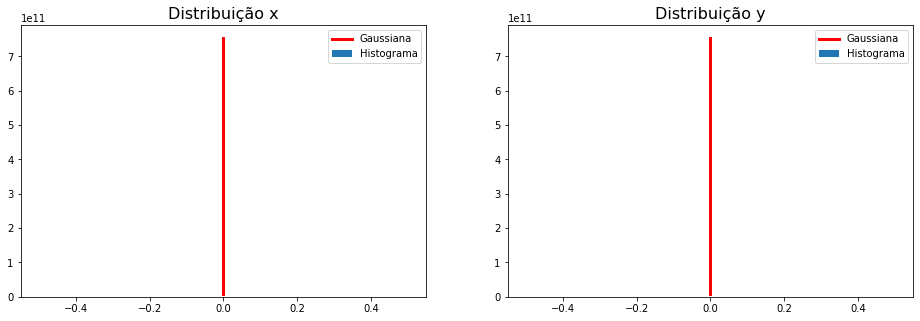

In [39]:
# Função que vai gerar 2 números random Gaussianos (função dada pelo professor na aula)
def gaussian():
  r=sqrt(-2*sigma*sigma*log(1-random()))
  theta=2*pi*random()
  x=r*cos(theta)
  y=r*sin(theta)
  return x,y

# Definição das distribuições x e y e a sua representação graficamente
x,y = gaussian()

centro_distx,centro_disty = (0,0)             # centro das distribuições x e y
desvio_x,desvio_y = (0.01*a0,0.01*a0)         # desvios das distribuições x e y

# intervalos dos eixos dos gráficos
x1 = np.linspace(-3*desvio_x+centro_distx,3*desvio_x+centro_distx,N_total)     
x2 = np.linspace(-3*desvio_y+centro_disty,3*desvio_y+centro_disty,N_total)

# Definição da gaussiana (criação da função gaussiana)
gauss = lambda x,centro,desvio: 1/(((2*np.pi)**(0.5))*desvio)*np.exp(-0.5*(((x-centro)/desvio)**2))

# Construção dos gráficos das distribuições x e y 
fig, (ax,ay) = plt.subplots(1,2,figsize=(16,5))
ax.set_title('Distribuição x',fontsize=16)
ax.hist(x, bins='auto',density='True',label='Histograma')
ax.plot(x1,gauss(x1,centro_distx,desvio_x),'-r',label='Gaussiana',linewidth=3)
ax.legend()
ay.set_title('Distribuição y',fontsize=16)
ay.hist(y, bins='auto',density='True', label='Histograma')
ay.plot(x2,gauss(x2,centro_disty,desvio_y),'-r',label='Gaussiana',linewidth=3)
ay.legend()
plt.show()



In [22]:
# Basicamente, o método de Monte-Carlo que vamos aplicar vai ser dado por:

N_dis = 0
while elem<theta:
    if elem > np.pi/2:
        N_dis += 1
prob = N_dis/N_total

print('O número total de partículas a ser lançadas é:',N_total)
print('O número total de partículas a ser dispersadas a um ângulo superior a 90º é:',N_dis)
print('A probabilidade pedida no enunciado é igual a:', prob*100,'%')

NameError: name 'elem' is not defined